## Immobilier Lille

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import joblib
import sys,os
from pathlib import Path
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb


## chargement des data ville csv

In [29]:
file = Path().resolve().parents[0] / "data" / "lille_2022.csv"
#file = Path().resolve().parents[0] / "data" / "bordeaux_2022.csv"
df = pd.read_csv(file)
df.columns = df.columns.str.strip()

In [30]:
print(df.columns.tolist())

['Identifiant de document', 'Reference document', '1 Articles CGI', '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI', 'No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere', 'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal', 'Commune', 'Code departement', 'Code commune', 'Prefixe de section', 'Section', 'No plan', 'No Volume', '1er lot', 'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot', '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot', 'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot', 'Nombre de lots', 'Code type local', 'Type local', 'Identifiant local', 'Surface reelle bati', 'Nombre pieces principales', 'Nature culture', 'Nature culture speciale', 'Surface terrain', 'prix_m2']


In [31]:
df_filtered = df[df['Nombre pieces principales'] == 4]
df.head(10)


,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,prix_m2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,0,1.0,Maison,NaN,82.0,5,S,NaN,70.0,2681.707317
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,2,2.0,Appartement,NaN,63.0,3,NaN,NaN,NaN,2936.507937
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,2,3.0,Dépendance,NaN,0.0,0,NaN,NaN,NaN,inf
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,1,3.0,Dépendance,NaN,0.0,0,NaN,NaN,NaN,inf
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,1,3.0,Dépendance,NaN,0.0,0,NaN,NaN,NaN,inf
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2022,Vente,...,1,3.0,Dépendance,NaN,0.0,0,NaN,NaN,NaN,inf
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2022,Vente,...,1,2.0,Appartement,NaN,38.0,2,NaN,NaN,NaN,3167.105263
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2022,Vente,...,2,2.0,Appartement,NaN,50.0,2,NaN,NaN,NaN,3600.000000
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2022,Vente,...,2,3.0,Dépendance,NaN,0.0,0,NaN,NaN,NaN,inf
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10/01/2022,Vente,...,0,3.0,Dépendance,NaN,0.0,0,S,NaN,274.0,inf


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11354 entries, 0 to 11353
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Identifiant de document     0 non-null      float64
 1   Reference document          0 non-null      float64
 2   1 Articles CGI              0 non-null      float64
 3   2 Articles CGI              0 non-null      float64
 4   3 Articles CGI              0 non-null      float64
 5   4 Articles CGI              0 non-null      float64
 6   5 Articles CGI              0 non-null      float64
 7   No disposition              11354 non-null  int64  
 8   Date mutation               11354 non-null  object 
 9   Nature mutation             11354 non-null  object 
 10  Valeur fonciere             11354 non-null  float64
 11  No voie                     11248 non-null  float64
 12  B/T/Q                       652 non-null    object 
 13  Type de voie                113

In [33]:
df_filtered.describe()

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Valeur fonciere,No voie,...,4eme lot,5eme lot,Nombre de lots,Code type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture speciale,Surface terrain,prix_m2
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,789.000000,7.890000e+02,786.000000,...,7.000000,2.000000,789.000000,789.000000,0.0,789.000000,789.0,0.0,389.000000,789.000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.003802,3.617395e+05,109.216285,...,14.857143,14.500000,0.808619,1.551331,NaN,87.695817,4.0,NaN,153.984576,4098.246166
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.061584,4.882171e+05,566.304972,...,15.847487,9.192388,0.954618,0.497674,NaN,21.887837,0.0,NaN,108.590334,5404.121420
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000e+00,1.000000,...,6.000000,8.000000,0.000000,1.000000,NaN,18.000000,4.0,NaN,31.000000,0.011494
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000e+05,12.000000,...,6.500000,11.250000,0.000000,1.000000,NaN,75.000000,4.0,NaN,90.000000,2500.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.599000e+05,32.000000,...,7.000000,14.500000,1.000000,2.000000,NaN,84.000000,4.0,NaN,132.000000,3095.866667
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,3.500000e+05,77.000000,...,14.500000,17.750000,2.000000,2.000000,NaN,97.000000,4.0,NaN,179.000000,3900.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,4.738000e+06,9002.000000,...,49.000000,21.000000,8.000000,2.000000,NaN,215.000000,4.0,NaN,1207.000000,52065.934066


## jeux de données distincts :

In [34]:
df_house=df_filtered[df_filtered['Type local'].str.contains("Maison")==True]
df_apartment=df_filtered[df_filtered['Type local'].str.contains("Appartement")==True]

In [35]:
df_house.describe()


,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Valeur fonciere,No voie,...,4eme lot,5eme lot,Nombre de lots,Code type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture speciale,Surface terrain,prix_m2
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,354.000000,354.000000,354.000000,...,0.0,0.0,354.000000,354.0,0.0,354.000000,354.0,0.0,340.000000,354.000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.002825,251205.864379,83.234463,...,NaN,NaN,0.039548,1.0,NaN,84.310734,4.0,NaN,142.638235,3003.594635
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.053149,105865.398518,484.663978,...,NaN,NaN,0.195171,0.0,NaN,19.462888,0.0,NaN,84.800103,1116.900260
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,16000.000000,1.000000,...,NaN,NaN,0.000000,1.0,NaN,44.000000,4.0,NaN,31.000000,144.144144
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,185032.500000,12.000000,...,NaN,NaN,0.000000,1.0,NaN,71.000000,4.0,NaN,84.750000,2291.390977
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,237550.000000,30.000000,...,NaN,NaN,0.000000,1.0,NaN,80.500000,4.0,NaN,127.000000,2847.948718
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,290000.000000,70.250000,...,NaN,NaN,0.000000,1.0,NaN,95.000000,4.0,NaN,175.250000,3481.995492
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,753750.000000,9002.000000,...,NaN,NaN,1.000000,1.0,NaN,165.000000,4.0,NaN,607.000000,9192.073171


In [36]:
df_apartment.describe()

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Valeur fonciere,No voie,...,4eme lot,5eme lot,Nombre de lots,Code type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture speciale,Surface terrain,prix_m2
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,435.000000,4.350000e+02,432.000000,...,7.000000,2.000000,435.000000,435.0,0.0,435.000000,435.0,0.0,49.000000,435.000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.004598,4.516911e+05,130.506944,...,14.857143,14.500000,1.434483,2.0,NaN,90.450575,4.0,NaN,232.714286,4989.066032
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.067728,6.368548e+05,625.068605,...,15.847487,9.192388,0.865204,0.0,NaN,23.340679,0.0,NaN,193.109533,7087.899307
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000e+00,1.000000,...,6.000000,8.000000,0.000000,2.0,NaN,18.000000,4.0,NaN,43.000000,0.011494
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.150000e+05,12.000000,...,6.500000,11.250000,1.000000,2.0,NaN,77.000000,4.0,NaN,136.000000,2617.078231
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.850000e+05,33.000000,...,7.000000,14.500000,1.000000,2.0,NaN,85.000000,4.0,NaN,176.000000,3285.714286
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,4.297500e+05,84.000000,...,14.500000,17.750000,2.000000,2.0,NaN,99.000000,4.0,NaN,306.000000,4310.382231
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,4.738000e+06,9001.000000,...,49.000000,21.000000,8.000000,2.0,NaN,215.000000,4.0,NaN,1207.000000,52065.934066


In [37]:
#keep specifi culumn 
df_house=df_house[['Surface reelle bati','Nombre pieces principales','Type local','Surface terrain','Nombre de lots','Valeur fonciere','prix_m2']]
df_apartment=df_apartment[['Surface reelle bati','Nombre pieces principales','Type local','Nombre de lots','Valeur fonciere','prix_m2']]


In [38]:
df_house.head()

,Surface reelle bati,Nombre pieces principales,Type local,Surface terrain,Nombre de lots,Valeur fonciere,prix_m2
18,165.0,4,Maison,121.0,0,305000.0,1848.484848
65,64.0,4,Maison,127.0,0,226900.0,3545.312500
161,70.0,4,Maison,192.0,0,205890.0,2941.285714
168,62.0,4,Maison,96.0,0,159500.0,2572.580645
176,72.0,4,Maison,135.0,0,259900.0,3609.722222


In [39]:
df_house=df_house.dropna()
df_apartment=df_apartment.dropna()


print(df_house.shape[0])
print(df_apartment.shape[0]) 

340
435


On remarque qu'on a beaucoup plus d'écahantillons pour les maison que pour les appartement. les 4 5 appartement a 50 000 € m² peux fausser les prédictions de la regression lineaire.

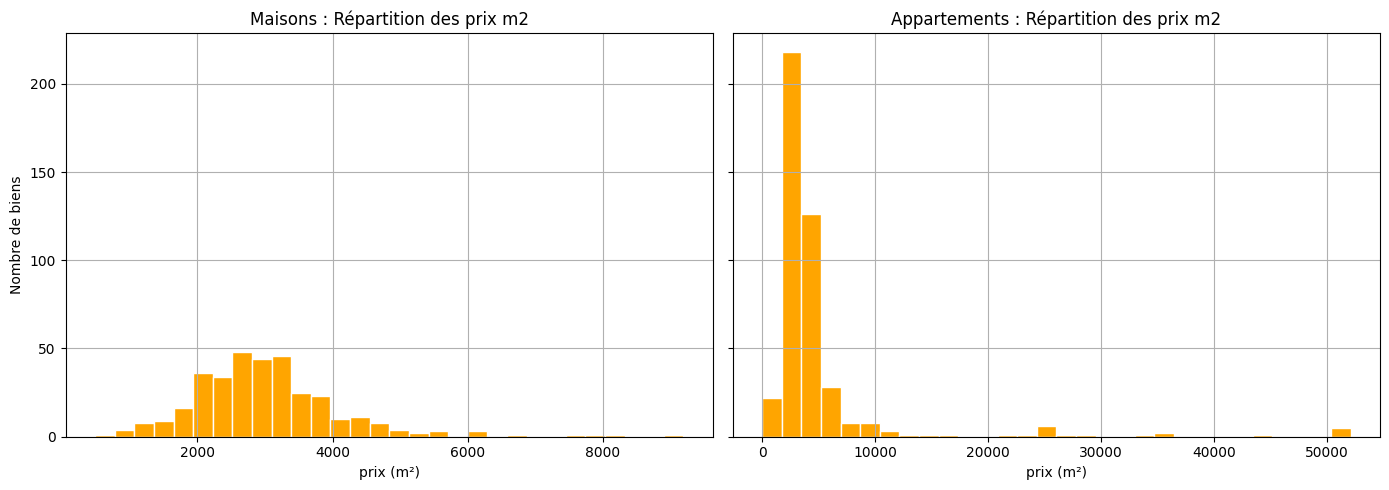

In [40]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 5), sharey=True)

# Histogramme des maisons
axes[0].hist(df_house['prix_m2'], bins=30, color='orange', edgecolor='w')
axes[0].set_title("Maisons : Répartition des prix m2")
axes[0].set_xlabel("prix (m²)")
axes[0].set_ylabel("Nombre de biens")
axes[0].grid(True)

# Histogramme des appartements
axes[1].hist(df_apartment['prix_m2'], bins=30, color='orange', edgecolor='w')
axes[1].set_title("Appartements : Répartition des prix m2")
axes[1].set_xlabel("prix (m²)")
axes[1].grid(True)

plt.tight_layout()
plt.show()

Pour les maison on remarque que els prix sont plus uniform.

  Tandis que pour appartement on remarque plus que c'est sporadique il a beaucoup d'écart a regarder de plsu prés pour les outliner.

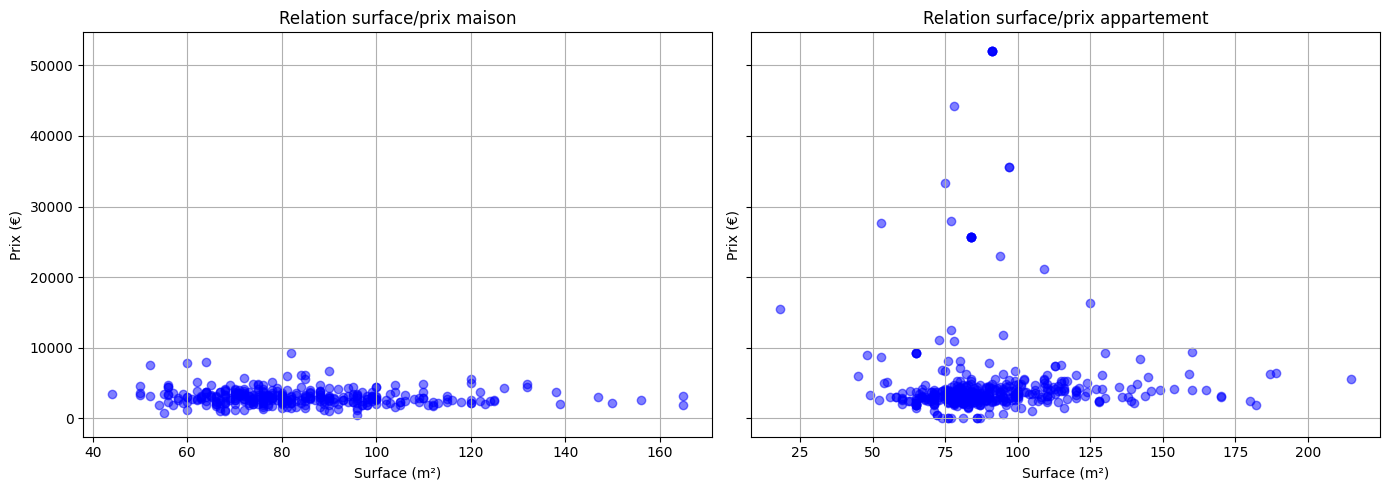

In [41]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 5), sharey=True)

# nuage de point des maison
axes[0].scatter(df_house['Surface reelle bati'], df_house['prix_m2'], color='blue', alpha=0.5)
axes[0].set_title("Relation surface/prix maison")
axes[0].set_xlabel("Surface (m²)")
axes[0].set_ylabel("Prix (€)")
axes[0].grid(True)

# nuage de point des appartements
axes[1].scatter(df_apartment['Surface reelle bati'], df_apartment['prix_m2'], color='blue', alpha=0.5)
axes[1].set_title("Relation surface/prix appartement")
axes[1].set_xlabel("Surface (m²)")
axes[1].set_ylabel("Prix (€)")
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Outlier

Detection des valeurs abbérante pour le prix

In [42]:
def detect_outliers(df, column):
    # Calcul du 1er quartile (25 % des valeurs les plus basses)
    Q1 = df[column].quantile(0.25)
    
    # Calcul du 3e quartile (75 % des valeurs les plus basses)
    Q3 = df[column].quantile(0.75)
    
    # Calcul de l'écart interquartile (zone "normale" des données)
    IQR = Q3 - Q1
    
    # Définition de la borne inférieure (valeurs trop basses)
    lower_bound = Q1 - 1.5 * IQR
    
    # Définition de la borne supérieure (valeurs trop hautes)
    upper_bound = Q3 + 1.5 * IQR
    
    # Retourne un tuple contenant :
    # - la borne inférieure des valeurs acceptables,
    # - la borne supérieure des valeurs acceptables,
    # - les lignes du DataFrame où les valeurs de la colonne spécifiée sont considérées comme des outliers (hors bornes)
    return (
        lower_bound, 
        upper_bound, 
        df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        )



In [43]:
print("Outliers prix maison :\n", detect_outliers(df_house, "prix_m2")[2], "\n")
print("Outliers prix appartement:\n", detect_outliers(df_apartment, "prix_m2")[2], "\n")

Outliers prix maison :
        Surface reelle bati  Nombre pieces principales Type local  \
1636                  96.0                          4     Maison   
2419                  78.0                          4     Maison   
3196                  85.0                          4     Maison   
3370                  81.0                          4     Maison   
3716                  64.0                          4     Maison   
4438                  60.0                          4     Maison   
5091                  82.0                          4     Maison   
6073                  90.0                          4     Maison   
8730                  84.0                          4     Maison   
8981                  72.0                          4     Maison   
9022                  85.0                          4     Maison   
9185                  62.0                          4     Maison   
9277                 120.0                          4     Maison   
10554                 52

enlever la valeur abbérante pour le prix

In [44]:
# Si nécessaire, exclure les outliers pour des variable spécifiques
lower_bound, upper_bound, _ = detect_outliers(df_house, "prix_m2")
df_house = df_house[~((df_house["prix_m2"] < lower_bound) | (df_house["prix_m2"] > upper_bound))]

lower_bound, upper_bound, _ = detect_outliers(df_apartment, "prix_m2")
df_apartment = df_apartment[~((df_apartment["prix_m2"] < lower_bound) | (df_apartment["prix_m2"] > upper_bound))]

In [45]:
print(df_house.shape[0])
print(df_apartment.shape[0]) 

326
386


Comme le calcul du prix_m² est prix_m2 = Valeur fonciere / Surface reelle bati on doit écarter les 2 colomne du calcul.

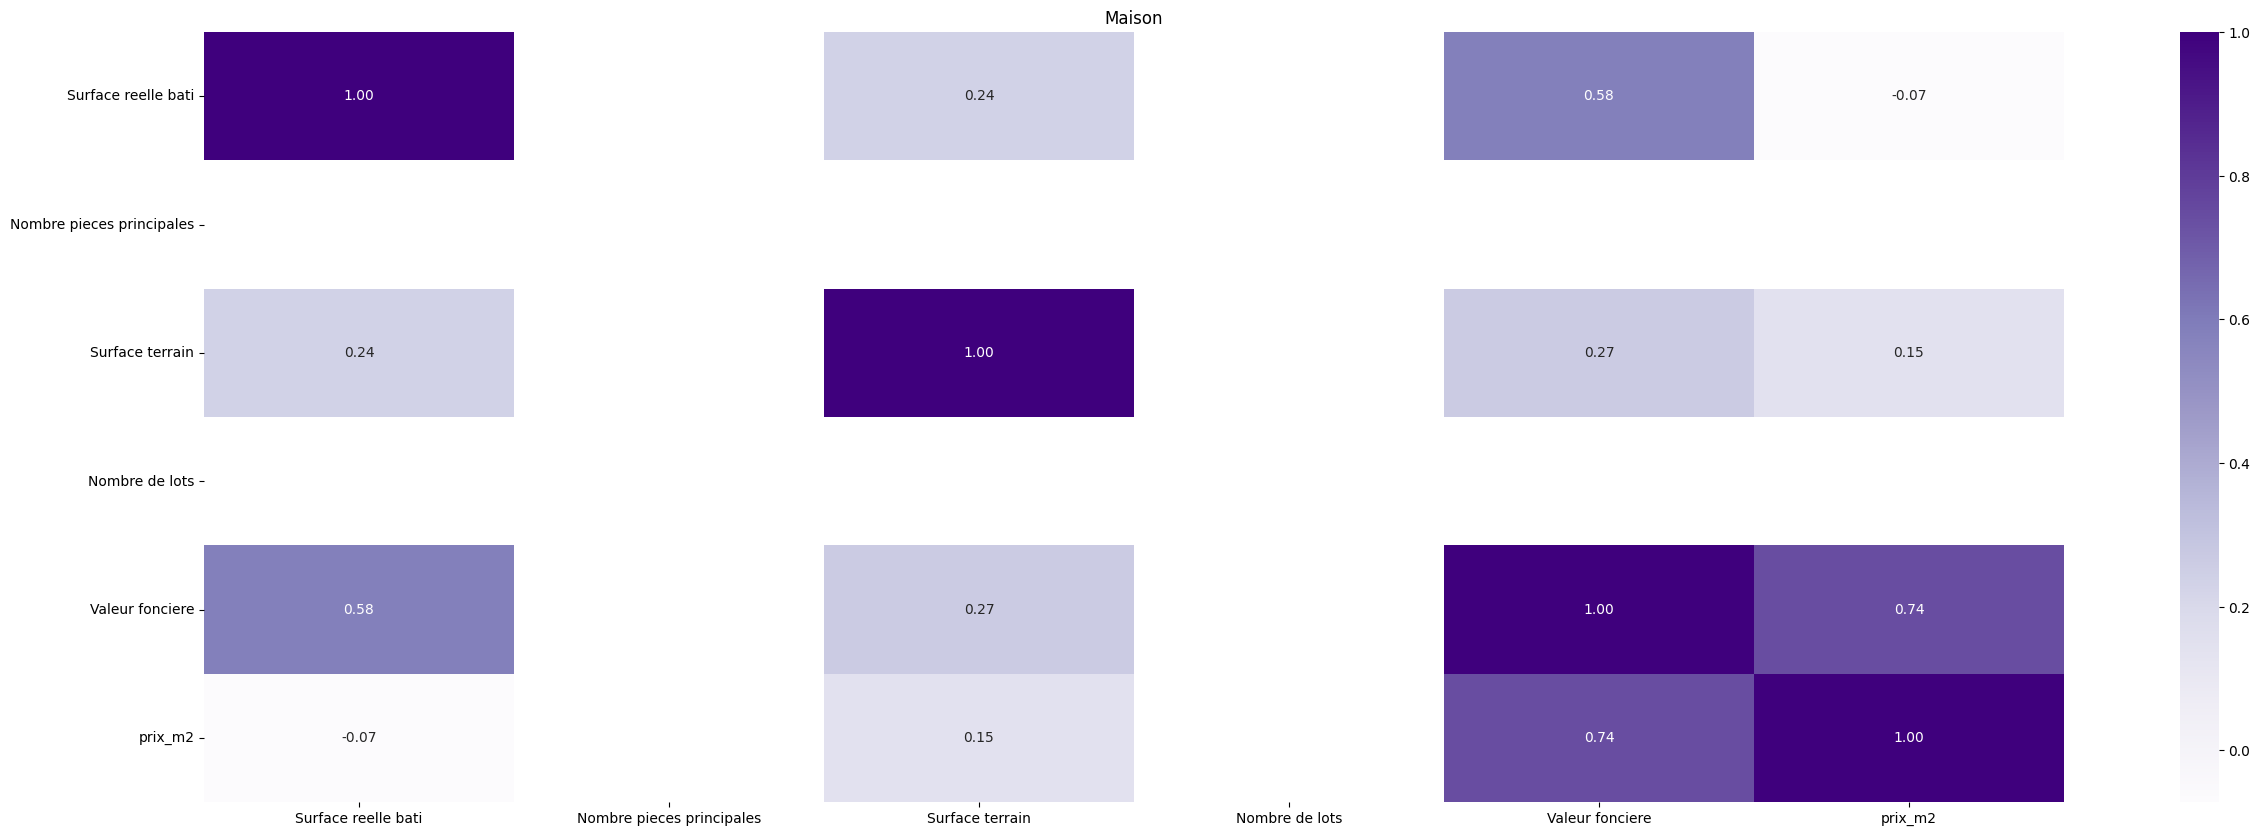

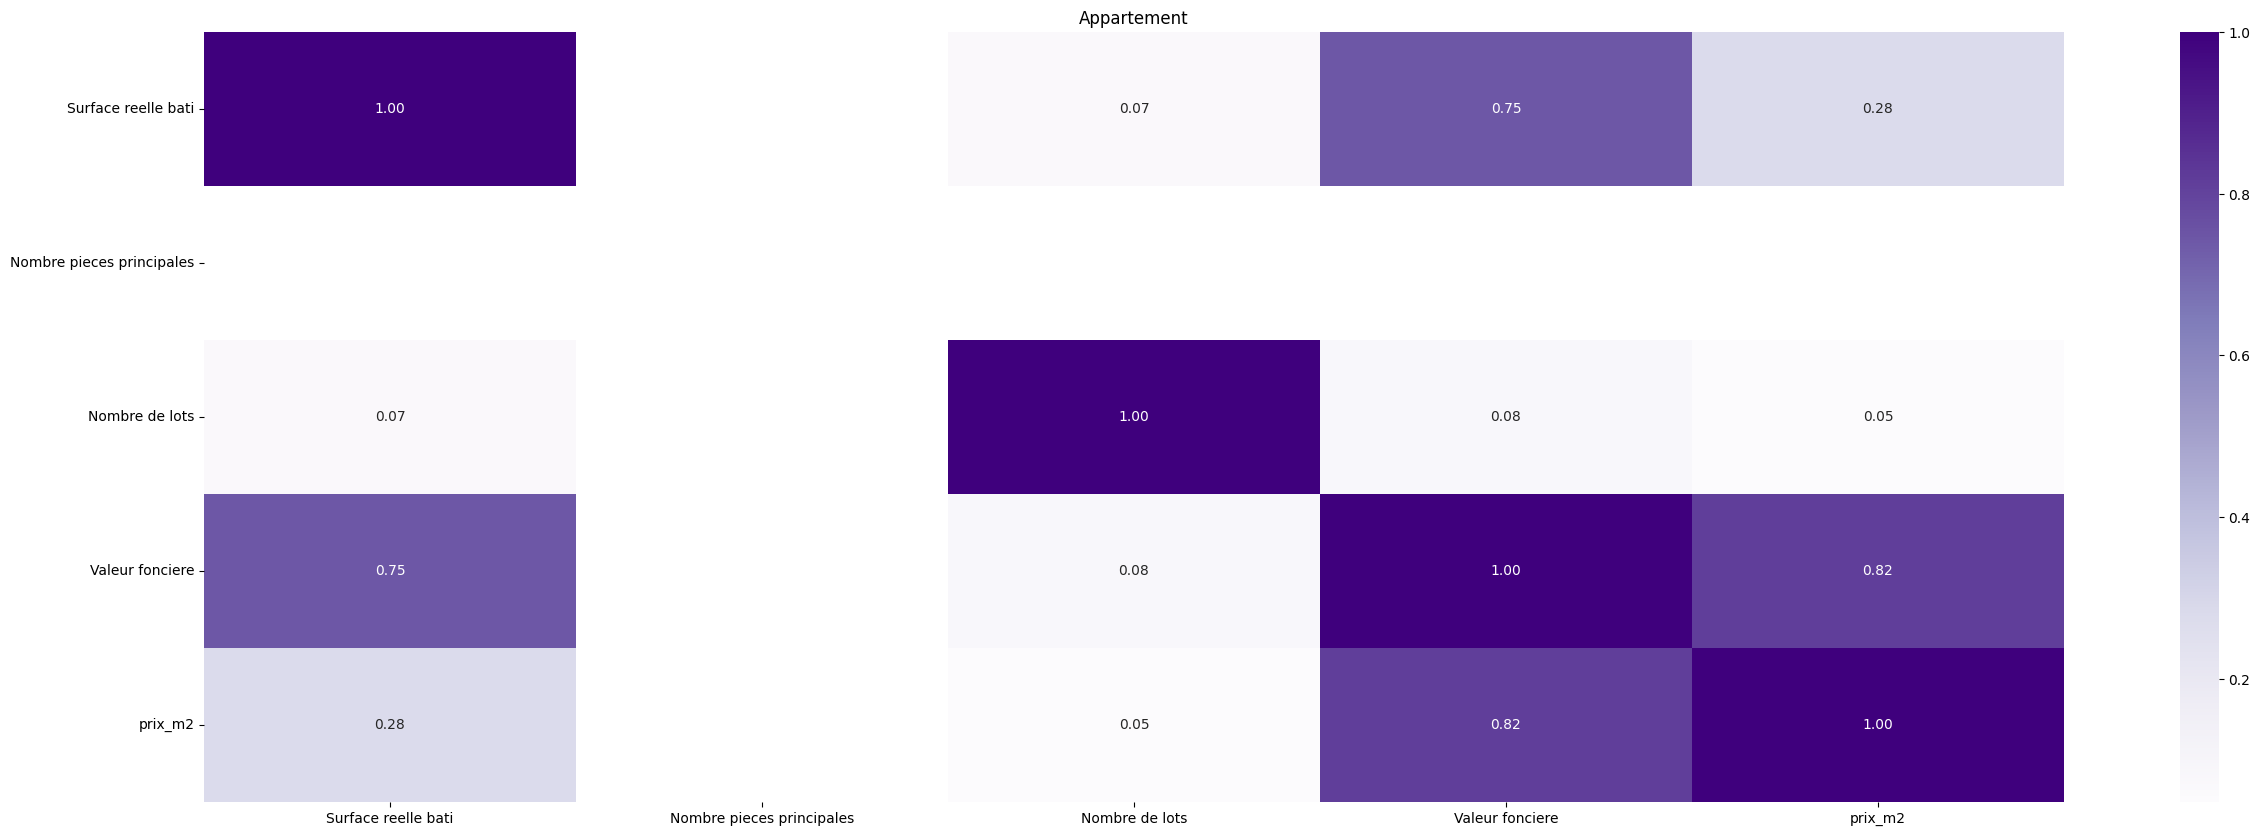

In [46]:
df_tempo = df_house.drop('Type local', axis=1)

plt.figure(figsize=(30,10))
plt.title("Maison")
sns.heatmap(df_tempo.corr(),annot=True, cmap='Purples', fmt=".2f")
plt.show()

df_tempo = df_apartment.drop('Type local', axis=1)
plt.figure(figsize=(30,10))
plt.title("Appartement")
sns.heatmap(df_tempo.corr(),annot=True, cmap='Purples', fmt=".2f")
plt.show()

## Évaluer les performances de tous les modèles

In [47]:
#fonction qui permet des comparer plusieurs model et leurs perferormance
def run_regression_pipeline(df, features, target, title="Résultats des modèles"):

# from sklearn.linear_model import LinearRegression, Ridge, Lasso
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import DecisionTreeRegressor

    X = df[features].values
    y = df[[target]].values

    # Découpage train / test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = {
        "LinearRegression": LinearRegression(),
        "DecisionTree": DecisionTreeRegressor(),
        "RandomForest": RandomForestRegressor(),
    }
    X = df[features].values
    y = df[[target]].values

    # Découpage train / test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = {
        "LinearRegression": LinearRegression(),
        "DecisionTree": DecisionTreeRegressor(),
        "RandomForest": RandomForestRegressor(),
    }

    results = {}
    pipelines = {}

    for name, model in models.items():
        pipe = Pipeline([
            ("scaler", StandardScaler()),
            ("model", model)
        ])
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results[name] = {"RMSE": rmse, "MAE": mae, "R2": r2}
        pipelines[name] = pipe

        print(f"=== {name} ===")
        print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R2: {r2:.3f}\n")

    results_df = pd.DataFrame(results).T.reset_index().rename(columns={"index": "Model"})

    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    sns.barplot(data=results_df, x="Model", y="RMSE", ax=ax[0], palette="Blues_d")
    ax[0].set_title("RMSE des modèles")
    ax[0].set_ylabel("RMSE")

    sns.barplot(data=results_df, x="Model", y="R2", ax=ax[1], palette="Greens_d")
    ax[1].set_title("Score R2 des modèles")
    ax[1].set_ylabel("R2")

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

    return results_df, pipelines

Entre les 3 modéle suivant (LinearRegression, DecisionTree ,RandomForest)

  Le meilleurs model est la regression linéairepour les maison avec un RMSE de 790

=== LinearRegression ===
RMSE: 784.25, MAE: 595.03, R2: 0.022

=== DecisionTree ===
RMSE: 1283.39, MAE: 1026.68, R2: -1.618



c:\simplon_dev\python\W11\immoprice_api\.venv\Lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


=== RandomForest ===
RMSE: 903.95, MAE: 686.57, R2: -0.299



C:\Users\dell\AppData\Local\Temp\ipykernel_6224\2598578633.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="RMSE", ax=ax[0], palette="Blues_d")
C:\Users\dell\AppData\Local\Temp\ipykernel_6224\2598578633.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="R2", ax=ax[1], palette="Greens_d")


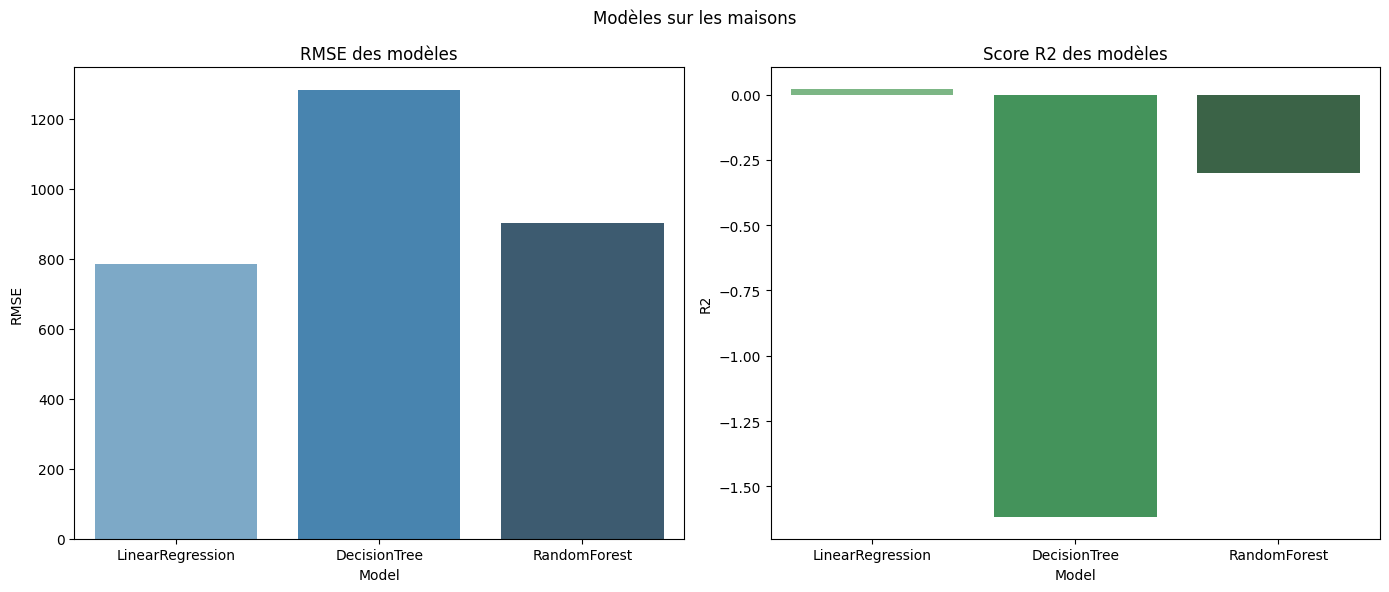

In [48]:
features_house = ["Surface terrain","Surface reelle bati"]
results_house, models_house = run_regression_pipeline(
    df=df_house,
    features=features_house,
    target="prix_m2",
    title="Modèles sur les maisons"
)

Entre les 3 modéle suivant (LinearRegression, DecisionTree ,RandomForest)

  Le meilleurs model est la regression DecisionTree on une valeur de RMSE proche le seul qui peux trancher c le R²

=== LinearRegression ===
RMSE: 1175.72, MAE: 888.98, R2: -0.030

=== DecisionTree ===
RMSE: 1156.48, MAE: 871.27, R2: 0.003

=== RandomForest ===
RMSE: 1155.59, MAE: 870.94, R2: 0.005



c:\simplon_dev\python\W11\immoprice_api\.venv\Lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\dell\AppData\Local\Temp\ipykernel_6224\2598578633.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="RMSE", ax=ax[0], palette="Blues_d")
C:\Users\dell\AppData\Local\Temp\ipykernel_6224\2598578633.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="R2", ax=ax[1], palette="Greens_d")


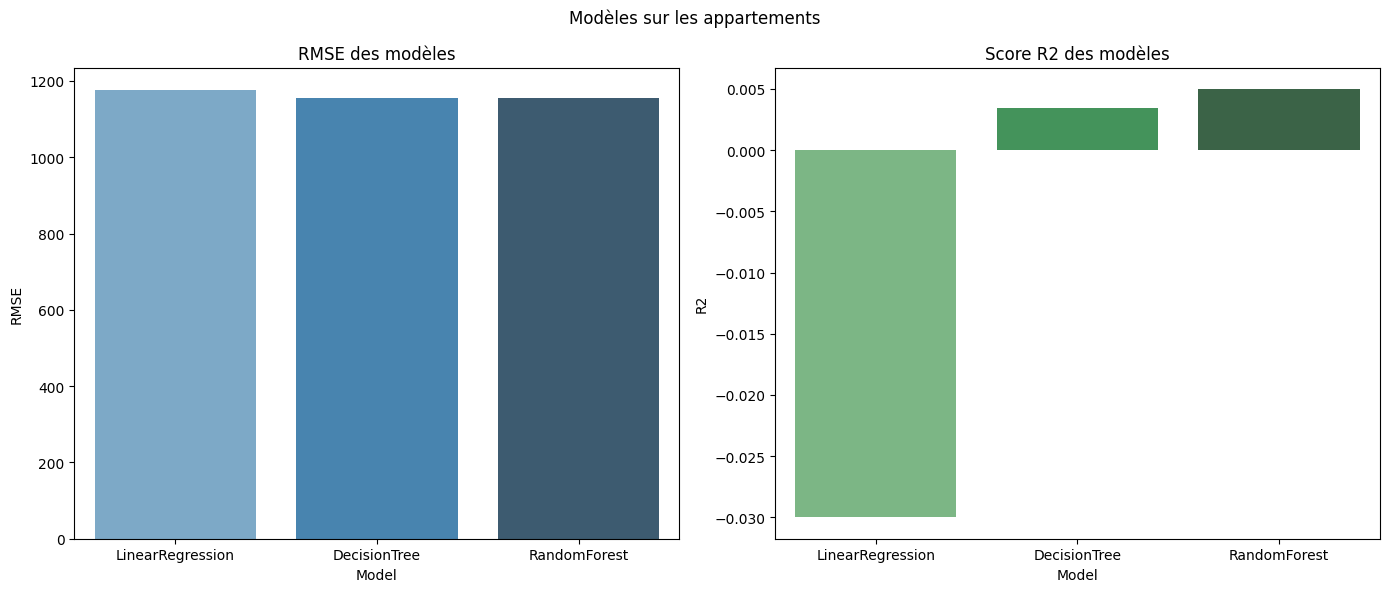

In [49]:
features_appart = ["Nombre de lots"]
results_appart, models_appart = run_regression_pipeline(
    df=df_apartment,
    features=features_appart,
    target="prix_m2",
    title="Modèles sur les appartements"
)

## gridsearchCV

In [50]:
def run_gridsearch_pipeline(df, features, target, title="Résultats des modèles"):

    X = df[features].values
    y = df[[target]].values

    # Découpage train / test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Modèles et grilles d'hyperparamètres
    models_and_params = {
        "LinearRegression": {
            "model": LinearRegression(),
            "params": {}
        },
        "DecisionTree": {
            "model": DecisionTreeRegressor(),
            "params": {"model__max_depth": [3, 5, 10, None]}
        },
        "RandomForest": {
            "model": RandomForestRegressor(),
            "params": {
                "model__n_estimators": [50, 100],
                "model__max_depth": [5, 10, None]
            }
        }
    }

    results = []
    best_pipelines = {}

    for name, mp in models_and_params.items():
        pipe = Pipeline([
            ("scaler", StandardScaler()),
            ("model", mp["model"])
        ])

        grid = GridSearchCV(pipe, mp["params"], cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
        grid.fit(X_train, y_train)

        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results.append({
            "Model": name,
            "Best Params": grid.best_params_,
            "RMSE": rmse,
            "MAE": mae,
            "R2": r2
        })

        best_pipelines[name] = best_model

        print(f"=== {name} ===")
        print("Best params:", grid.best_params_)
        print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R2: {r2:.3f}\n")

    results_df = pd.DataFrame(results)

    # Affichage des barplots
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    sns.barplot(data=results_df, x="Model", y="RMSE", ax=ax[0], palette="Blues_d")
    ax[0].set_title("RMSE des modèles")
    ax[0].set_ylabel("RMSE")

    sns.barplot(data=results_df, x="Model", y="R2", ax=ax[1], palette="Greens_d")
    ax[1].set_title("Score R2 des modèles")
    ax[1].set_ylabel("R2")

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

    return results_df, best_pipelines

La différence avec gridsearch c'est toujours LinearRegression qui a le meilleurs RMSE proche mais le R² est meilleurs 

=== LinearRegression ===
Best params: {}
RMSE: 784.25, MAE: 595.03, R2: 0.022

=== DecisionTree ===
Best params: {'model__max_depth': 3}
RMSE: 806.93, MAE: 610.04, R2: -0.035



c:\simplon_dev\python\W11\immoprice_api\.venv\Lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\dell\AppData\Local\Temp\ipykernel_6224\2696832518.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="RMSE", ax=ax[0], palette="Blues_d")


=== RandomForest ===
Best params: {'model__max_depth': 5, 'model__n_estimators': 100}
RMSE: 820.43, MAE: 620.28, R2: -0.070



C:\Users\dell\AppData\Local\Temp\ipykernel_6224\2696832518.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="R2", ax=ax[1], palette="Greens_d")


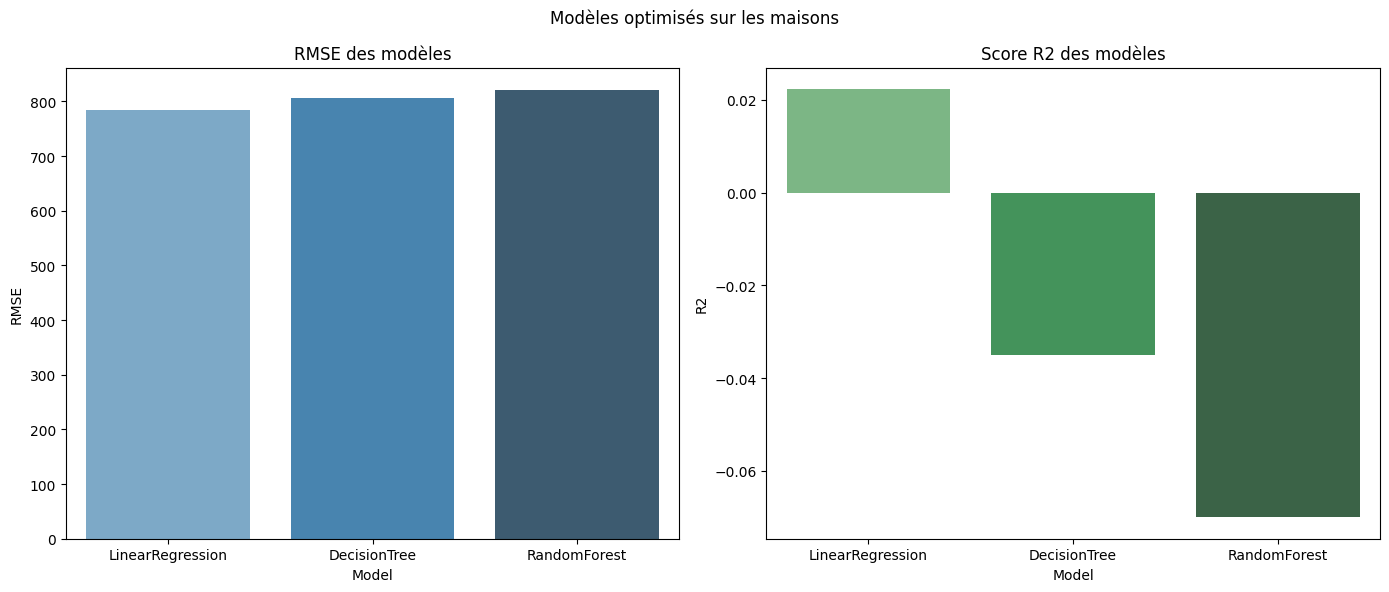

In [51]:
features_house = ["Surface terrain","Surface reelle bati"]
results_house, models_house = run_gridsearch_pipeline(
    df=df_house,
    features=features_house,
    target="prix_m2",
    title="Modèles optimisés sur les maisons"
)

La différence avec gridsearch c'est des resultat similaire pour decisionthree et randomForest

=== LinearRegression ===
Best params: {}
RMSE: 1250.62, MAE: 897.04, R2: -0.165

=== DecisionTree ===
Best params: {'model__max_depth': 3}
RMSE: 1324.24, MAE: 913.27, R2: -0.307



c:\simplon_dev\python\W11\immoprice_api\.venv\Lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\dell\AppData\Local\Temp\ipykernel_6224\2696832518.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="RMSE", ax=ax[0], palette="Blues_d")


=== RandomForest ===
Best params: {'model__max_depth': 5, 'model__n_estimators': 50}
RMSE: 1237.52, MAE: 860.80, R2: -0.141



C:\Users\dell\AppData\Local\Temp\ipykernel_6224\2696832518.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="R2", ax=ax[1], palette="Greens_d")


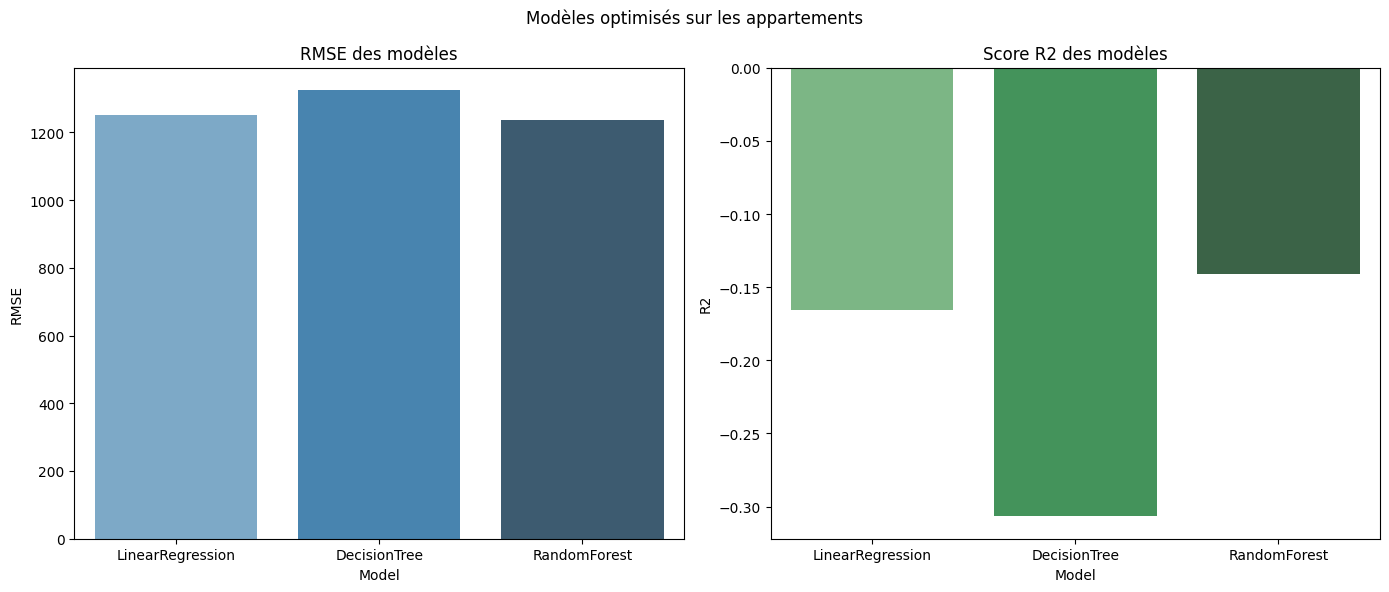

In [52]:
features_apartment = ["Nombre de lots","Surface reelle bati"]
results_apartment, models_apartment = run_gridsearch_pipeline(
    df=df_apartment,
    features=features_apartment,
    target="prix_m2",
    title="Modèles optimisés sur les appartements"
)

In [53]:
def generate_test(df,features,target):
    X = df[features].values
    y = df[[target]].values.ravel()

    # Découpage train / test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(X.shape) 
    print(y.shape)

    return X_train, X_test, y_train, y_test

In [64]:
df_house_clean = df_house[["Surface terrain","Surface reelle bati", "prix_m2"]]
df_house_clean["Surface terrain"]=df_house_clean[["Surface terrain"]].ffill()
features_house = ["Surface terrain","Surface reelle bati"]
X_house_train, X_house_test, y_house_train, y_house_test = generate_test(
    df=df_house_clean,
    features=features_house,
    target="prix_m2"
)

df_apartment_clean = df_apartment[["Nombre de lots","Surface reelle bati" ,"prix_m2"]]
df_apartment_clean["Nombre de lots"] =df_apartment_clean["Nombre de lots"].ffill()
features_apartment = ["Nombre de lots","Surface reelle bati"]
X_apartment_train, X_apartment_test, y_apartment_train, y_apartment_test = generate_test(
    df=df_apartment_clean,
    features=features_apartment,
    target="prix_m2"
)

(326, 2)
(326,)
(386, 2)
(386,)


C:\Users\dell\AppData\Local\Temp\ipykernel_6224\2213681087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house_clean["Surface terrain"]=df_house_clean[["Surface terrain"]].ffill()
C:\Users\dell\AppData\Local\Temp\ipykernel_6224\2213681087.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apartment_clean["Nombre de lots"] =df_apartment_clean["Nombre de lots"].ffill()


In [65]:
def run_XGBRegressor(X_train,y_train,X_test,y_test):
    # Define XGBRegressor model parameters
    params = {
        'objective': 'reg:squarederror',
        'max_depth': 1,
        'learning_rate': 0.05,
        'n_estimators': 10,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'random_state': 42
    }

    # Instantiate XGBRegressor with the parameters
    model = xgb.XGBRegressor(**params)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate model performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")
    
    return model

In [66]:
models_house_xgbreg= run_XGBRegressor(X_house_train, y_house_train, X_house_test, y_house_test)

Mean Squared Error: 642035.69
R-squared: -0.02


In [67]:
models_apartment_xgbreg= run_XGBRegressor(X_apartment_train, y_apartment_train, X_apartment_test, y_apartment_test)

Mean Squared Error: 1367859.67
R-squared: -0.02


## Pipeline avec XGBRegressor

In [68]:
def run_gridsearch_pipeline2(df, features, target, title="Résultats des modèles"):

    X = df[features].values
    y = df[[target]].values.ravel()

    # cut train / test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # model and grid hyperparam
    models_and_params = {
        "LinearRegression": {
            "model": LinearRegression(),
            "params": {}
        },
        "DecisionTree": {
            "model": DecisionTreeRegressor(),
            "params": {"model__max_depth": [3, 5, 10, None]}
        },
        "RandomForest": {
            "model": RandomForestRegressor(),
            "params": {
                "model__n_estimators": [50, 100],
                "model__max_depth": [5, 10, None]
            }
        },
        "XGBRegressor": {
            "model": xgb.XGBRegressor(),
            "params": {
                    'model__objective': ["reg:squarederror"],
                    'model__max_depth': [1, 3, 5],
                    'model__learning_rate': [0.01, 0.05, 0.1],
                    'model__n_estimators': [10, 50, 100],
                    'model__subsample': [0.8],
                    'model__colsample_bytree': [0.8],
                    'model__random_state': [42]
                }
        }
    }

    results = []
    best_pipelines = {}

    for name, mp in models_and_params.items():
        pipe = Pipeline([
            ("scaler", StandardScaler()),
            ("model", mp["model"])
        ])

        grid = GridSearchCV(pipe, mp["params"], cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
        grid.fit(X_train, y_train)

        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results.append({
            "Model": name,
            "Best Params": grid.best_params_,
            "RMSE": rmse,
            "MAE": mae,
            "R2": r2
        })

        best_pipelines[name] = best_model

        print(f"=== {name} ===")
        print("Best params:", grid.best_params_)
        print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R2: {r2:.3f}\n")

    results_df = pd.DataFrame(results)

    # display barplots
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    sns.barplot(data=results_df, x="Model", y="RMSE", ax=ax[0], palette="Blues_d")
    ax[0].set_title("RMSE des modèles")
    ax[0].set_ylabel("RMSE")

    sns.barplot(data=results_df, x="Model", y="R2", ax=ax[1], palette="Greens_d")
    ax[1].set_title("Score R2 des modèles")
    ax[1].set_ylabel("R2")

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

    return results_df, best_pipelines

On remarque que même avec XGBRegressor LinearRegression reste toujorus le meilleurs model. Même si XGBRegressor est proche de LinearRegression le précédent a un R²positif

=== LinearRegression ===
Best params: {}
RMSE: 784.25, MAE: 595.03, R2: 0.022

=== DecisionTree ===
Best params: {'model__max_depth': 3}
RMSE: 806.93, MAE: 610.04, R2: -0.035

=== RandomForest ===
Best params: {'model__max_depth': 5, 'model__n_estimators': 50}
RMSE: 820.76, MAE: 624.72, R2: -0.071

=== XGBRegressor ===
Best params: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 10, 'model__objective': 'reg:squarederror', 'model__random_state': 42, 'model__subsample': 0.8}
RMSE: 803.77, MAE: 619.85, R2: -0.027



C:\Users\dell\AppData\Local\Temp\ipykernel_6224\4052936960.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="RMSE", ax=ax[0], palette="Blues_d")
C:\Users\dell\AppData\Local\Temp\ipykernel_6224\4052936960.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="R2", ax=ax[1], palette="Greens_d")


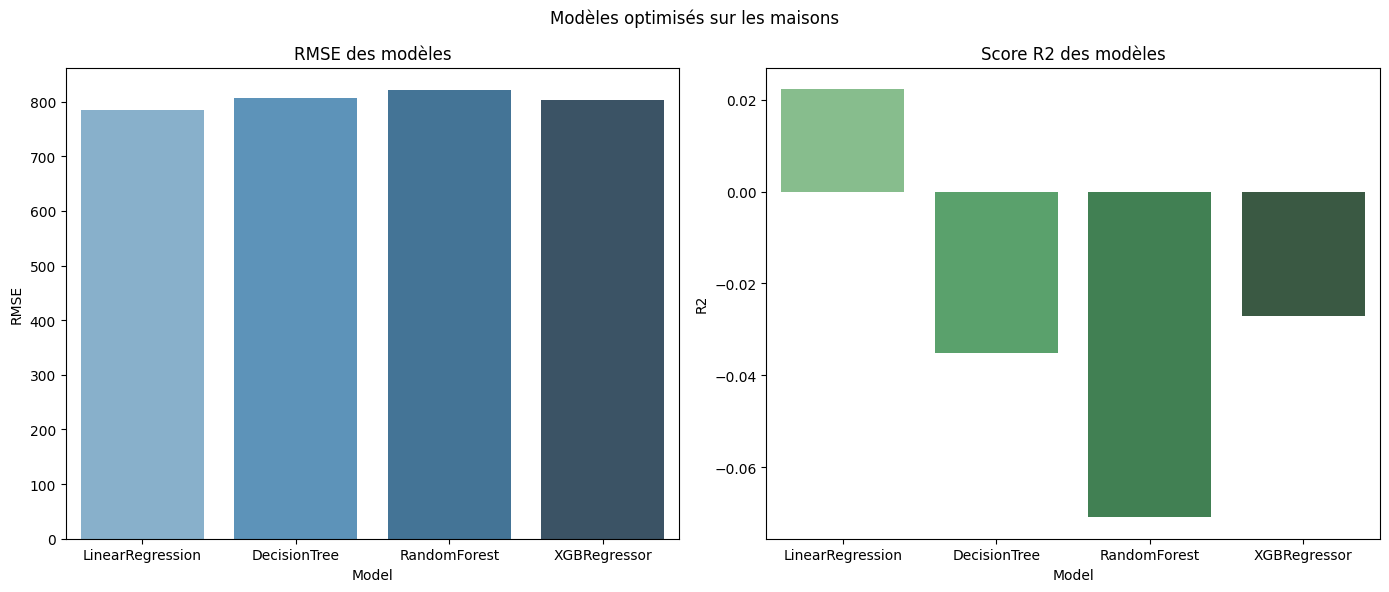

In [69]:
features_house = ["Surface terrain","Surface reelle bati"]
results_house, models_house = run_gridsearch_pipeline2(
    df=df_house,
    features=features_house,
    target="prix_m2",
    title="Modèles optimisés sur les maisons"
)

Pour les appartements XGBRegressor a le moin de RMSE.

=== LinearRegression ===
Best params: {}
RMSE: 1250.62, MAE: 897.04, R2: -0.165

=== DecisionTree ===
Best params: {'model__max_depth': 3}
RMSE: 1324.24, MAE: 913.27, R2: -0.307

=== RandomForest ===
Best params: {'model__max_depth': 5, 'model__n_estimators': 50}
RMSE: 1270.73, MAE: 868.42, R2: -0.203

=== XGBRegressor ===
Best params: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.05, 'model__max_depth': 1, 'model__n_estimators': 100, 'model__objective': 'reg:squarederror', 'model__random_state': 42, 'model__subsample': 0.8}
RMSE: 1184.44, MAE: 862.53, R2: -0.045



C:\Users\dell\AppData\Local\Temp\ipykernel_6224\4052936960.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="RMSE", ax=ax[0], palette="Blues_d")
C:\Users\dell\AppData\Local\Temp\ipykernel_6224\4052936960.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="R2", ax=ax[1], palette="Greens_d")


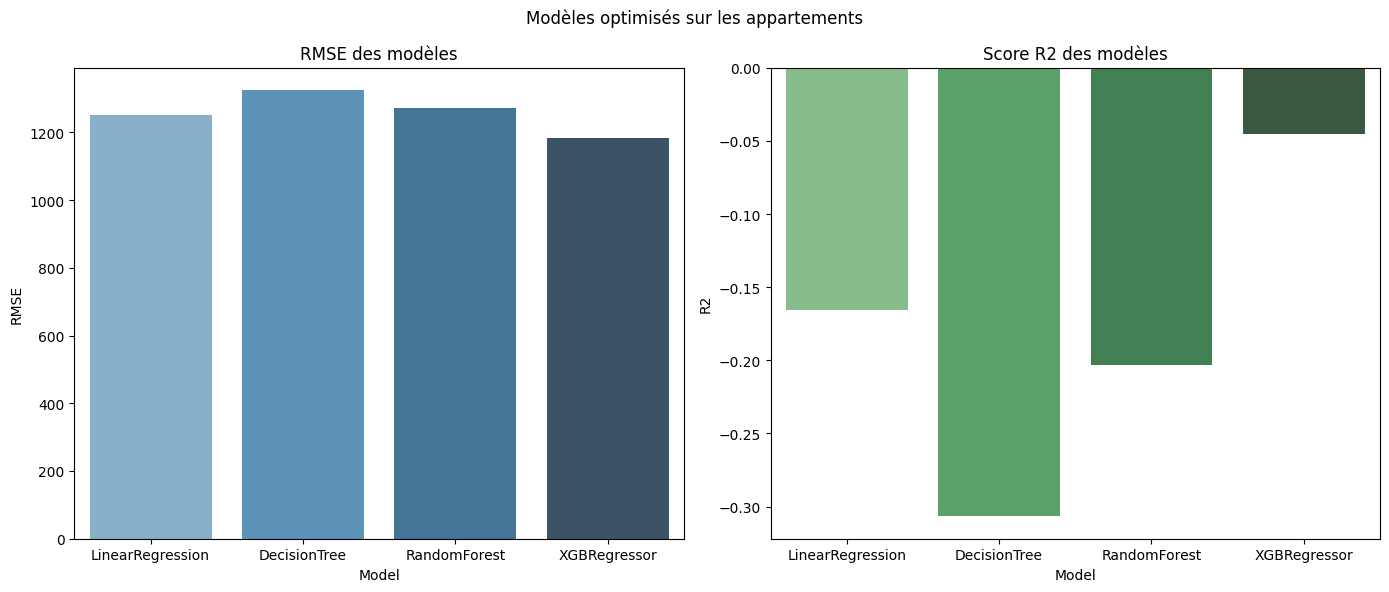

In [70]:
features_apartment = ["Nombre de lots","Surface reelle bati"]
results_apartment, models_apartment = run_gridsearch_pipeline2(
    df=df_apartment,
    features=features_apartment,
    target="prix_m2",
    title="Modèles optimisés sur les appartements"
)

In [74]:
#export model pour maison
best_model_name = "LinearRegression"

# Récupérer le pipeline complet du meilleur modèle
best_model = models_house[best_model_name]

# Extraire le scaler et le modèle du pipeline
scaler_X = best_model.named_steps['scaler']
model = best_model.named_steps['model']

# Sauvegarde du modèle et du scaler
joblib.dump(model, "../models/model_regression_house.pkl")
joblib.dump(scaler_X, "../models/scaler_X_house.pkl")

['../models/scaler_X_house.pkl']

In [ ]:
#export model pour appartement
best_model_name = "XGBRegressor"

# Récupérer le pipeline complet du meilleur modèle
best_model = models_apartment[best_model_name]

# Extraire le scaler et le modèle du pipeline
scaler_X = best_model.named_steps['scaler']
model = best_model.named_steps['model']

# Sauvegarde du modèle et du scaler
joblib.dump(model, "../models/model_regression_apartement.pkl")
joblib.dump(scaler_X, f"../models/scaler_X_apartement.pkl")

['../models/scaler_X_apartement.pkl']